<a href="https://colab.research.google.com/github/Messed-up/Stock-Predictor/blob/main/Stock_Prediction_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gamestop (GME) Datasets - Yahoo Finance.xls to Gamestop (GME) Datasets - Yahoo Finance.xls


In [ ]:
df = pd.read_excel('Gamestop (GME) Datasets - Yahoo Finance.xls')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,12.45,13.180000,12.42,13.07,12.641105,2124200
1,2019-01-03,12.98,13.260000,12.69,12.97,12.544387,1750400
2,2019-01-04,14.03,15.290000,13.70,15.24,14.739896,11915700
3,2019-01-07,15.11,15.810000,14.94,15.48,14.972020,4718000
4,2019-01-08,15.50,15.890000,15.15,15.81,15.291192,3443800
5,2019-01-09,15.84,16.389999,15.72,15.98,15.455612,3554500


In [ ]:
df.shape


(566, 7)

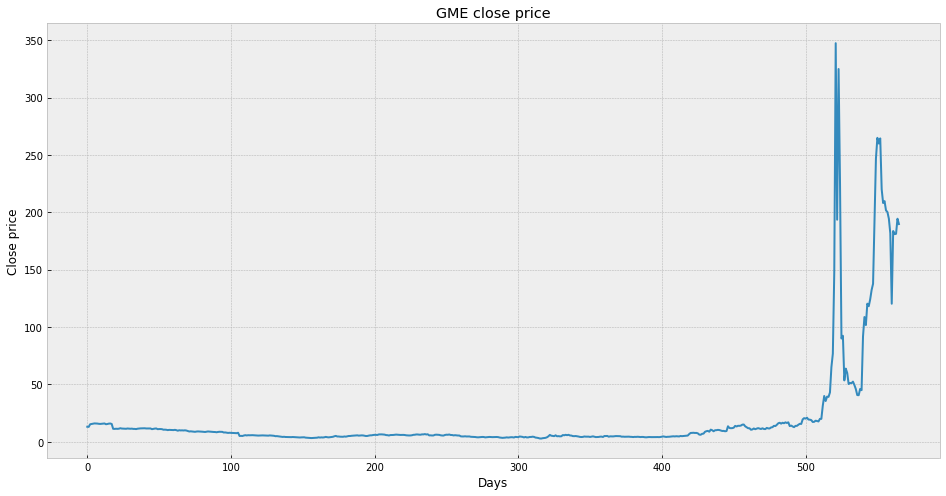

In [ ]:
#visualize close price
plt.figure(figsize=(16,8))
plt.title('GME close price')
plt.xlabel("Days")
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Get close price
#df=df["Close"]
#df.head(4)
pass

In [ ]:
# predict price in future
future_days = 40
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)
df=df[['Close','Prediction']]
df


,Close,Prediction
0,13.070000,11.75
1,12.970000,11.57
2,15.240000,11.60
3,15.480000,11.56
4,15.810000,11.59
...,...,...
561,183.750000,NaN
562,181.000000,NaN
563,181.300003,NaN
564,194.460007,NaN


In [ ]:
#Feature dataset , convert into np array
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

In [ ]:
# Target dataset ,get all target values except last 50 rows of data
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 11.75      11.57      11.6       11.56      11.59      10.97
  11.26      11.47      11.58      10.95      11.06      11.07
  10.96      10.5       10.55      10.45      10.14      10.35
  10.29      10.19      10.16      10.37      10.1        9.63
  10.03       9.86       9.94       9.82       9.97       9.76
   9.32       8.94       9.08       8.94       8.77       8.65
   8.89       9.01       8.95       8.89       8.76       8.65
   8.51       8.77       8.97       8.85       8.77       8.69
   8.52       8.48       8.26       8.53       8.69       8.67
   8.61       8.06       8.13       7.9        7.7        7.82
   7.74       7.57       7.6        7.58       7.47       7.82
   5.04       5.13       5.02       5.44       5.72       5.5
   5.7        5.63       5.7        5.73       5.63       5.53
   5.42       5.37       5.45       5.47       5.54       5.47
   5.36       5.38       5.31       5.52       5.45       5.31
   5.18       4.84       4.91       4.75       4.63     

In [ ]:
# split data into 90 percent training and 10 percent test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
#Create Models
#Decision Tree
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Linear Regression
lr = LinearRegression().fit(x_train, y_train)


In [ ]:
# get last 'x' rows of feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(len(x_future))

In [ ]:
# Show Decision tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show Linear Regression prediction

lr_prediction = lr.predict(x_future)
print(len(lr_prediction))

[ 92.410004  193.600006   63.77       60.         50.310001   31.9600005
  51.099998   52.400002   52.400002   45.939999   40.689999   10.95
  46.         44.970001   91.709999  108.730003  101.739998  120.400002
 118.18      124.18      132.350006  137.740005  194.5       246.899994
 265.        265.        264.5       209.809998  208.169998  209.809998
 201.75      200.270004  194.490005  194.490005  181.        183.75
 181.        181.300003  194.460007  189.820007 ]

40


In [ ]:
# error
#err = []
#for i in range(len(tree_prediction)):
#  error =

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


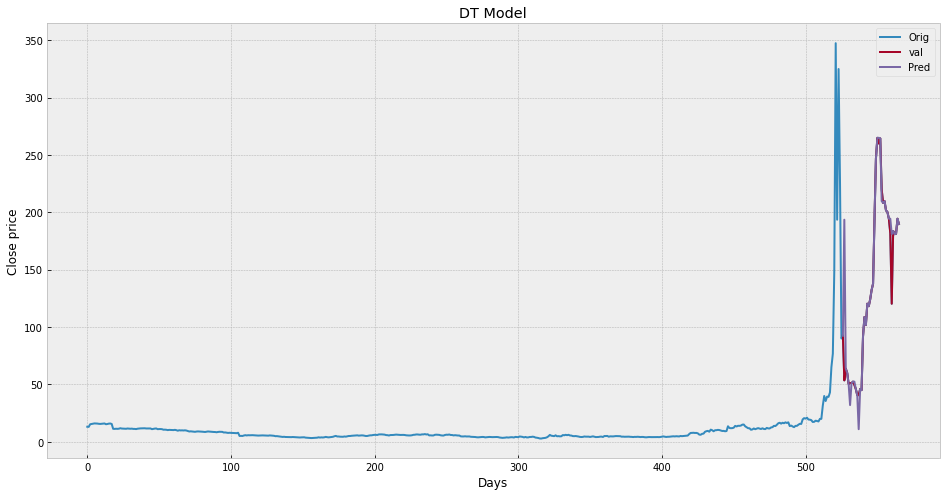

In [ ]:
# visualize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('DT Model')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig' , 'val' , 'Pred'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


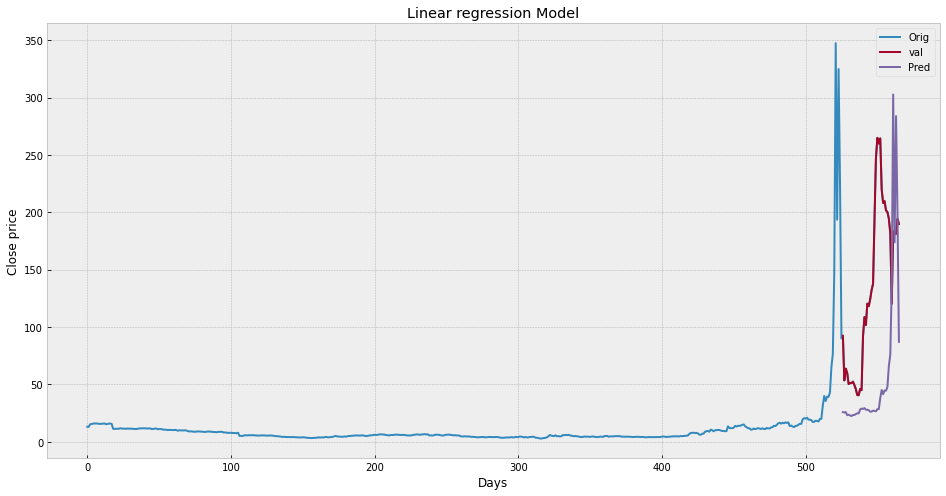

In [ ]:
# visualize the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Linear regression Model')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig' , 'val' , 'Pred'])